In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df_raw = pd.read_csv(filename)

Saving SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv to SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv


In [ ]:
df_raw.head(20)

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1
5,113FF,"Forestry, fishing, and related activities",methane,"kg/2018 USD, purchaser price",0.001,0.000,0.001,NaN,3,2,1,1,1
6,113FF,"Forestry, fishing, and related activities",nitrous oxide,"kg/2018 USD, purchaser price",0,0.000,0.000,NaN,4,2,1,4,1
7,113FF,"Forestry, fishing, and related activities",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,2,1,4,1
8,211,Oil and gas extraction,carbon dioxide,"kg/2018 USD, purchaser price",0.477,0.051,0.528,NaN,3,2,1,3,1
9,211,Oil and gas extraction,methane,"kg/2018 USD, purchaser price",0.024,0.001,0.025,NaN,4,2,1,1,1


Cleaning

In [ ]:

df = df_raw.copy()

df = df.drop(columns=["Unnamed: 7"])

if df.iloc[0, 4] == "Supply Chain Emission Factors without Margins":
    df = df[1:].reset_index(drop=True)

df["Supply Chain Emission Factors without Margins"] = pd.to_numeric(
    df["Supply Chain Emission Factors without Margins"], errors="coerce"
)
df["Supply Chain Emission Factors with Margins"] = pd.to_numeric(
    df["Supply Chain Emission Factors with Margins"], errors="coerce"
)

df = df.dropna(subset=["Supply Chain Emission Factors without Margins"])

print("Cleaned Data: ")
df.head(20)


Cleaned Data: 


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,3,2,1,1,1
1,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1
2,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,3,2,1,4,1
3,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,4,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",methane,"kg/2018 USD, purchaser price",0.001,0.000,0.001,3,2,1,1,1
5,113FF,"Forestry, fishing, and related activities",nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,4,2,1,4,1
6,113FF,"Forestry, fishing, and related activities",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,3,2,1,4,1
7,211,Oil and gas extraction,carbon dioxide,"kg/2018 USD, purchaser price",0.477,0.051,0.528,3,2,1,3,1
8,211,Oil and gas extraction,methane,"kg/2018 USD, purchaser price",0.024,0.001,0.025,4,2,1,1,1
9,211,Oil and gas extraction,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,3,2,1,3,1


Visualization

/tmp/ipython-input-10-242779793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


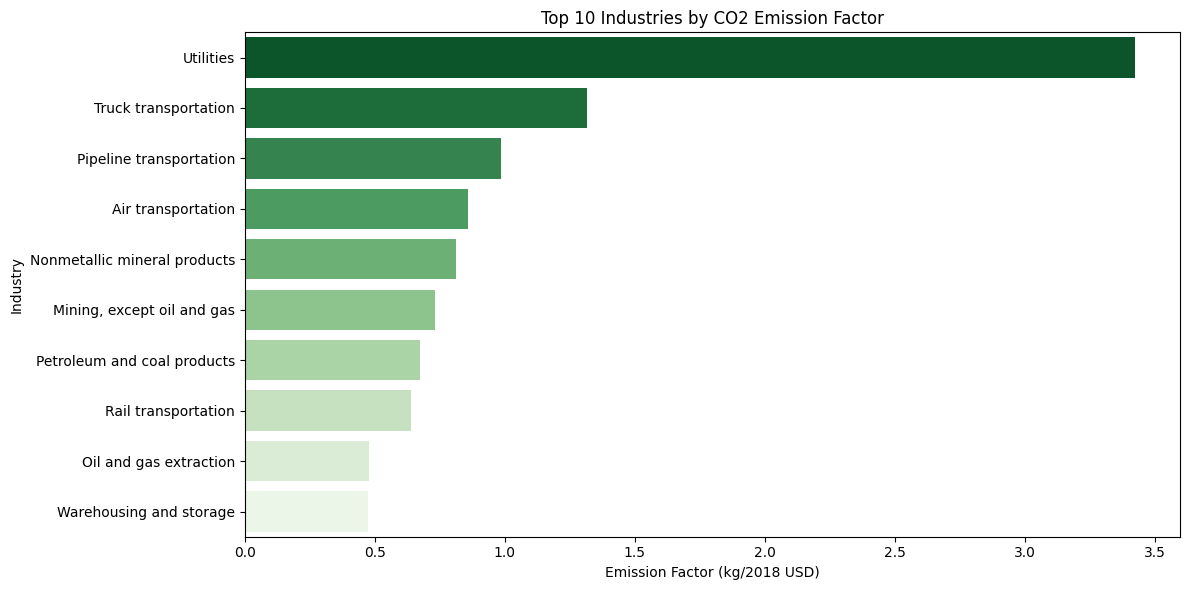

In [ ]:
# Top 10 Industries by CO2 Emission Factor

co2_df = df[df["Substance"] == "carbon dioxide"]
top_co2 = co2_df.nlargest(10, "Supply Chain Emission Factors without Margins")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_co2,
    x="Supply Chain Emission Factors without Margins",
    y="Industry Name",
    palette="Greens_r"
)
plt.title("Top 10 Industries by CO2 Emission Factor")
plt.xlabel("Emission Factor (kg/2018 USD)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-2102485535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


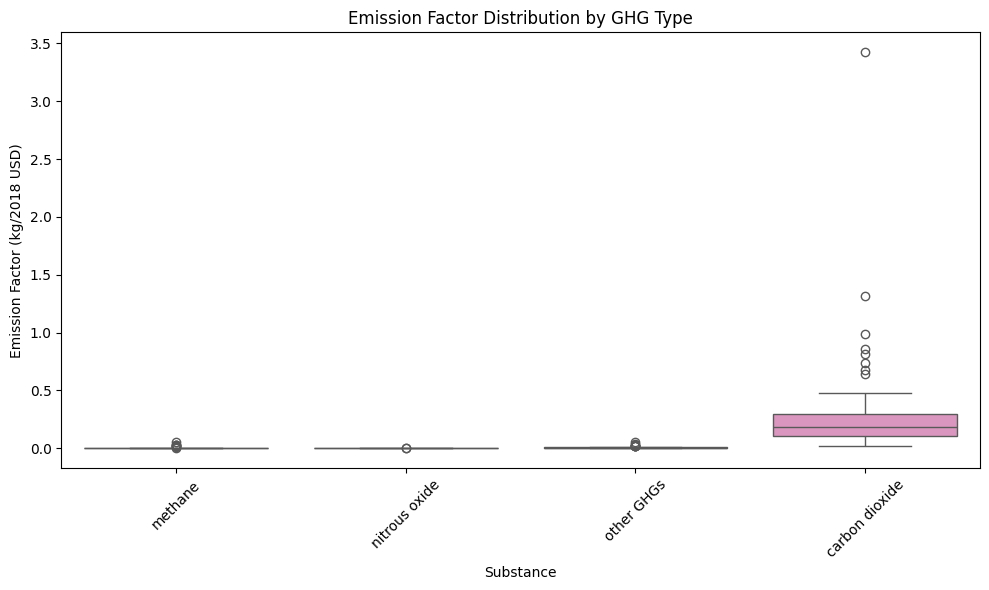

In [ ]:
# Emission Factor Distribution by Substance

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Substance",
    y="Supply Chain Emission Factors without Margins",
    palette="Set2"
)
plt.title("Emission Factor Distribution by GHG Type")
plt.ylabel("Emission Factor (kg/2018 USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


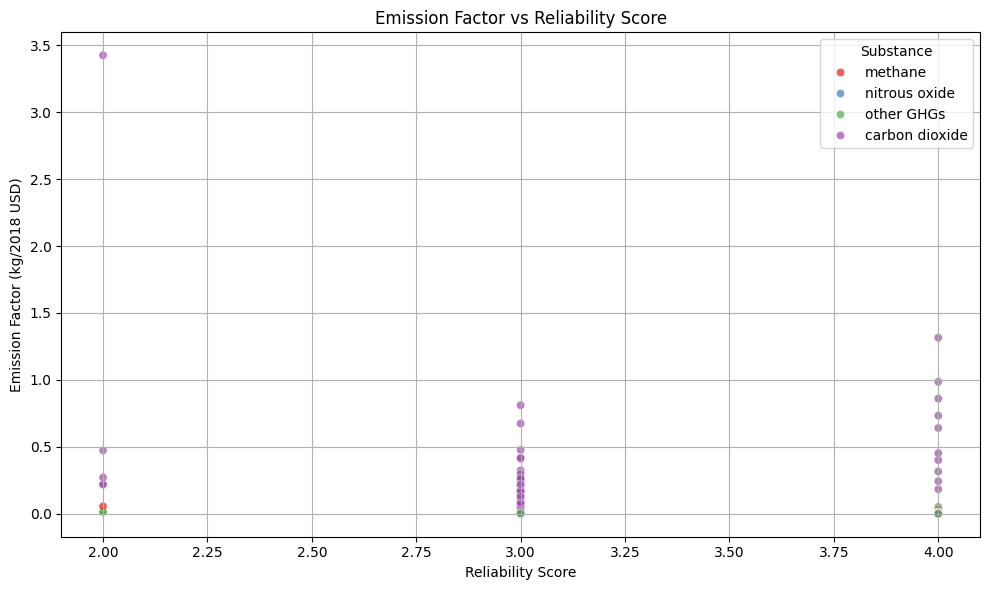

In [ ]:
#  Emission Factor vs Reliability Score

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="DQ ReliabilityScore of Factors without Margins",
    y="Supply Chain Emission Factors without Margins",
    hue="Substance",
    alpha=0.7,
    palette="Set1"
)
plt.title("Emission Factor vs Reliability Score")
plt.xlabel("Reliability Score")
plt.ylabel("Emission Factor (kg/2018 USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
